# **WORD2VEC & PMI**

Summary:


1.   Import *narco_schedule*
2.   Import Word2Vec and Train Models
3.   Relevant Terms
4.   Relevance along Temporal Dimension
5.   Correlation among Terms




---

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import sys
sys.path.append('/content/drive/My Drive/Università/inforet_prj/')

In [3]:
import pandas as pd
import numpy as np
from tqdm import tqdm
tqdm.pandas()
import pandas as pd
import pickle
import string
import seaborn as sns; sns.set()
from scipy.stats import norm
import matplotlib.pyplot as plt
import math
from nltk import ngrams
from gensim.models import Word2Vec
from gensim.models.keyedvectors import KeyedVectors
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer

## **1. Import narco_schedule**

In [4]:
with open("/content/drive/MyDrive/Università/inforet_prj/narco_schedule.pkl", "rb") as f:
  narco_schedule = pickle.load(f)

In [6]:
# ONLY ONE MODEL
narco_schedule = narco_schedule.loc[(narco_schedule.schedule == "narco_1") | (narco_schedule.schedule == "narco_2")  ] 

In [7]:
# ONLY ONE MODEL
narco_schedule

,schedule,lemmatized
1,narco_1,issue consolidated appeal constitutionality en...
2,narco_2,indict count murder aggravate criminal sexual ...


In [ ]:
narco_schedule_1 = narco_schedule.loc[(narco_schedule.schedule == "narco_1") ] 

In [ ]:
narco_schedule_2 = narco_schedule.loc[(narco_schedule.schedule == "narco_2") ] 

## **2. Import Word2Vec and Train Models**

In [ ]:
!wget -P /root/input/ -c "https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz"

In [9]:
EMBEDDING_FILE = '/root/input/GoogleNews-vectors-negative300.bin.gz'
word_vectors = KeyedVectors.load_word2vec_format(EMBEDDING_FILE, binary=True)

In [10]:
# ONLY ONE MODEL
narcos = ['narco_1', 'narco_2']

In [36]:
# ONLY ONE MODEL
n = 5
sequences = {}
for nar in narcos:
    for sched, x in tqdm(zip(narco_schedule.schedule, narco_schedule.lemmatized), total=narco_schedule.shape[0]):
        penta_gram = ngrams(x.split(), n)

        sequences[sched] = ([[y[0], y[1], y[2], y[3], y[4]] for y in penta_gram])

100%|██████████| 2/2 [00:06<00:00,  3.14s/it]


In [ ]:
n = 5
sequences_1 = {}
for sched, x in tqdm(zip(narco_schedule_1.schedule, narco_schedule_1.lemmatized), total=narco_schedule_1.shape[0]):
    penta_gram = ngrams(x.split(), n)

    sequences_1[sched] = ([[y[0], y[1], y[2], y[3], y[4]] for y in penta_gram])

In [ ]:
n = 5
sequences_2 = {}
for sched, x in tqdm(zip(narco_schedule_2.schedule, narco_schedule_2.lemmatized), total=narco_schedule_2.shape[0]):
    penta_gram = ngrams(x.split(), n)

    sequences_2[sched] = ([[y[0], y[1], y[2], y[3], y[4]] for y in penta_gram])

In [37]:
# ONLY ONE MODEL
import itertools
dict(itertools.islice(sequences.items(), 1))

{'narco_1': [['issue', 'consolidated', 'appeal', 'constitutionality', 'enact'],
  ['consolidated', 'appeal', 'constitutionality', 'enact', 'plaintiff'],
  ['appeal', 'constitutionality', 'enact', 'plaintiff', 'challenge'],
  ['constitutionality', 'enact', 'plaintiff', 'challenge', 'violative'],
  ['enact', 'plaintiff', 'challenge', 'violative', 'single'],
  ['plaintiff', 'challenge', 'violative', 'single', 'subject'],
  ['challenge', 'violative', 'single', 'subject', 'rule'],
  ['violative', 'single', 'subject', 'rule', 'contain'],
  ['single', 'subject', 'rule', 'contain', 'article'],
  ['subject', 'rule', 'contain', 'article', 'section'],
  ['rule', 'contain', 'article', 'section', 'rule'],
  ['contain', 'article', 'section', 'rule', 'unconstitutional'],
  ['article', 'section', 'rule', 'unconstitutional', 'ground'],
  ['section', 'rule', 'unconstitutional', 'ground', 'order'],
  ['rule', 'unconstitutional', 'ground', 'order', 'appellant'],
  ['unconstitutional', 'ground', 'order', '

---

In [38]:
# ONLY ONE MODEL
models = {}
for sched, sequence in sequences.items():
    models[sched] = Word2Vec(sequences[sched], min_count=10)

In [39]:
# ONLY ONE MODEL
import itertools
dict(itertools.islice(models.items(), 2))

{'narco_1': <gensim.models.word2vec.Word2Vec at 0x7f93c3f87f10>,
 'narco_2': <gensim.models.word2vec.Word2Vec at 0x7f93c675db10>}

In [ ]:
models_1 = {}
for schedule, sequence in sequences_1.items():
    models_1[schedule] = Word2Vec(sequences_1[schedule], min_count=10)

In [ ]:
models_2 = {}
for schedule, sequence in sequences_2.items():
    models_2[schedule] = Word2Vec(sequences_2[schedule], min_count=10)

---

In [ ]:
#with open("/content/drive/MyDrive/Università/inforet_prj/models_1.pkl", "wb") as f:
#    pickle.dump(models_1, f)

In [ ]:
#with open("/content/drive/MyDrive/Università/inforet_prj/models_2.pkl", "wb") as f:
#    pickle.dump(models_2, f)

---

## **3. Relevant Terms**

In [ ]:
with open("/content/drive/MyDrive/Università/inforet_prj/models_1.pkl", "rb") as f:
  models_1 = pickle.load(f)

In [ ]:
with open("/content/drive/MyDrive/Università/inforet_prj/models_2.pkl", "rb") as f:
  models_2 = pickle.load(f)

---

### *3.1 Cosine similarity own narcotics*

In [40]:
schedule_1 = ["cannabis",  "marijuana",  "lsd", "heroin", "ecstasy", "peyote", "mescaline", "mda" , 'methaqualone', "mdma", 'methaqualone' ]
schedule_2 = ["cocaine", "methamphetamine", "dilaudid", "meperidine", "demerol",  "dexedrine", "fentanyl", "ritalin", "methadone", "amphetamine", "phencyclidine", "pseudoephedrine", "ephedrine", "opium", "dilaudid", "preludin", "hydromorphone", 'oxycodone'] 

In [ ]:
# ONLY ONE MODEL
schedules = schedule_1 + schedule_2
schedules

In [42]:
# ONLY ONE MODEL
for sched, model in models.items():
    print(sched)

narco_1
narco_2


In [43]:
# ONLY ONE MODEL
for sched, model in models.items():
    if sched == 'narco_1':
        for y in schedule_1:
            if y in model.wv.vocab:
                print(sched, y, [(x[0], round(x[1], 2)) for x in model.wv.most_similar(positive=y)][:5])
    elif sched == 'narco_2':
        for y in schedule_2:
            if y in model.wv.vocab:
                print(sched, y, [(x[0], round(x[1], 2)) for x in model.wv.most_similar(positive=y)][:5])

narco_1 cannabis [('marijuana', 0.56), ('sativa', 0.56), ('heroin', 0.56), ('gram', 0.56), ('substance', 0.53)]
narco_1 marijuana [('junk', 0.58), ('reefer', 0.56), ('cannabis', 0.56), ('pot', 0.55), ('dope', 0.54)]
narco_1 lsd [('gram', 0.66), ('tablet', 0.61), ('mda', 0.61), ('controlled', 0.61), ('substance', 0.59)]
narco_1 heroin [('narcotic', 0.72), ('drug', 0.62), ('gram', 0.56), ('cannabis', 0.56), ('tablet', 0.53)]
narco_1 ecstasy [('pill', 0.67), ('pentazocine', 0.63), ('dagger', 0.61), ('glassine', 0.59), ('pink', 0.59)]
narco_1 peyote [('antidepressant', 0.68), ('bacterial', 0.67), ('tionality', 0.66), ('suspiciousness', 0.66), ('softly', 0.66)]
narco_1 mescaline [('morphine', 0.7), ('milligram', 0.68), ('ingestion', 0.68), ('bile', 0.65), ('opiate', 0.64)]
narco_1 mda [('placemat', 0.72), ('mope', 0.67), ('vile', 0.66), ('consignment', 0.65), ('phenmetrazene', 0.65)]
narco_1 methaqualone [('egyptian', 0.62), ('tetrahydrocannabinol', 0.62), ('mda', 0.62), ('vile', 0.61), ('h

In [ ]:
for sched, model in models_1.items():
    for y in schedule_1:
        if y in model.wv.vocab:
            print(sched, y, [(x[0], round(x[1], 2)) for x in model.wv.most_similar(positive=y)][:5])

In [ ]:
for sched, model in models_2.items():
    for y in schedule_2:
        if y in model.wv.vocab:
            print(sched, y, [(x[0], round(x[1], 2)) for x in model.wv.most_similar(positive=y)][:5])

In [46]:
def most_similar_list_value(model_, word, n):
    lista = []
    for sched, model in model_.items():
        if word in model.wv.vocab:
            for x in model.wv.most_similar(positive=word)[:n]:
                lista.append([x[0],round(x[1], 2)])
    return lista

In [47]:
# ONLY ONE MODEL
narco_1_cannabis = most_similar_list_value(models, 'cannabis', 10)
narco_1_marijuana = most_similar_list_value(models, 'marijuana', 10)
narco_1_lsd = most_similar_list_value(models, 'lsd', 10)
narco_1_heroin = most_similar_list_value(models, 'heroin', 10)
narco_1_mdma = most_similar_list_value(models, 'mdma', 10)

terms_narco_1 = pd.concat([pd.DataFrame(narco_1_cannabis, columns=['cannabis', 'value']), 
                           pd.DataFrame(narco_1_marijuana, columns=['marijuana', 'value']), 
                           pd.DataFrame(narco_1_lsd, columns=['lsd', 'value']), 
                           pd.DataFrame(narco_1_heroin, columns=['heroin', 'value']), 
                           pd.DataFrame(narco_1_mdma, columns=['mdma', 'value'])],                                              
                           axis=1)
terms_narco_1

,cannabis,value,marijuana,value,lsd,value,heroin,value,mdma,value
0,marijuana,0.56,junk,0.58,gram,0.66,narcotic,0.72,twig,0.65
1,sativa,0.56,reefer,0.56,tablet,0.61,drug,0.62,homogeneous,0.59
2,heroin,0.56,cannabis,0.56,mda,0.61,gram,0.56,tablet,0.59
3,gram,0.56,pot,0.55,controlled,0.61,cannabis,0.56,medicinal,0.55
4,substance,0.53,dope,0.54,substance,0.59,tablet,0.53,grain,0.55
5,drug,0.53,underage,0.51,homogeneous,0.59,powder,0.52,gram,0.55
6,manufacture,0.52,cider,0.51,nonnarcotic,0.58,dope,0.52,resin,0.54
7,contraband,0.51,cigarette,0.49,diacetyl,0.58,capsule,0.52,vile,0.54
8,hashish,0.47,mog,0.49,pentazocine,0.57,tinfoil,0.52,diacetyl,0.53
9,plant,0.47,heroin,0.49,manufacture,0.57,pill,0.49,chloroform,0.53


In [ ]:
narco_1_cannabis = most_similar_list_value(models_1, 'cannabis', 10)
narco_1_marijuana = most_similar_list_value(models_1, 'marijuana', 10)
narco_1_lsd = most_similar_list_value(models_1, 'lsd', 10)
narco_1_heroin = most_similar_list_value(models_1, 'heroin', 10)
narco_1_mdma = most_similar_list_value(models_1, 'mdma', 10)

terms_narco_1 = pd.concat([pd.DataFrame(narco_1_cannabis, columns=['cannabis', 'value']), 
                           pd.DataFrame(narco_1_marijuana, columns=['marijuana', 'value']), 
                           pd.DataFrame(narco_1_lsd, columns=['lsd', 'value']), 
                           pd.DataFrame(narco_1_heroin, columns=['heroin', 'value']), 
                           pd.DataFrame(narco_1_mdma, columns=['mdma', 'value'])],                                              
                           axis=1)
terms_narco_1

,cannabis,value,marijuana,value,lsd,value,heroin,value,mdma,value
0,sativa,0.58,pot,0.57,diacetyl,0.64,narcotic,0.73,homogeneous,0.64
1,heroin,0.57,cannabis,0.56,gram,0.62,drug,0.64,tablet,0.60
2,marijuana,0.56,junk,0.55,barbituric,0.61,cannabis,0.57,twig,0.59
3,gram,0.55,reefer,0.54,tablet,0.61,tinfoil,0.56,vile,0.58
4,substance,0.53,underage,0.54,controlled,0.60,dope,0.54,pentazocine,0.57
5,contraband,0.53,cider,0.54,mda,0.60,marijuana,0.53,resin,0.57
6,drug,0.53,heroin,0.53,derivative,0.60,gram,0.50,diacetyl,0.55
7,plant,0.51,dope,0.52,twig,0.59,pill,0.50,grain,0.55
8,hashish,0.50,cigarette,0.49,pentazocine,0.59,tablet,0.50,lsd,0.54
9,manufacture,0.48,whiskey,0.49,indole,0.59,junk,0.50,medicinal,0.54


In [48]:
# ONLY ONE MODEL
narco_2_cocaine = most_similar_list_value(models, 'cocaine', 15)
narco_2_methamphetamine = most_similar_list_value(models, 'methamphetamine', 15)
narco_2_amphetamine = most_similar_list_value(models, 'amphetamine', 15)
narco_2_pseudoephedrine = most_similar_list_value(models, 'pseudoephedrine', 15)
narco_2_phencyclidine = most_similar_list_value(models, 'phencyclidine', 15)

terms_narco_2 = pd.concat([pd.DataFrame(narco_2_cocaine, columns=['cocaine', 'value']), 
                           pd.DataFrame(narco_2_methamphetamine, columns=['methamphetamine', 'value']),
                           pd.DataFrame(narco_2_amphetamine, columns=['amphetamine', 'value']),
                           pd.DataFrame(narco_2_pseudoephedrine, columns=['pseudoephedrine', 'value']), 
                           pd.DataFrame(narco_2_phencyclidine, columns=['phencyclidine', 'value'])],
                          axis=1)
terms_narco_2

,cocaine,value,methamphetamine,value,amphetamine,value,pseudoephedrine,value,phencyclidine,value
0,drug,0.73,pseudoephedrine,0.64,caffeine,0.73,ephedrine,0.73,mixture,0.71
1,narcotic,0.68,phencyclidine,0.59,phencyclidine,0.67,salt,0.73,salt,0.70
2,sixteenth,0.59,manufacture,0.57,pill,0.66,capsule,0.69,amphetamine,0.67
3,prepackage,0.56,manufacturing,0.54,barbiturate,0.64,barbituric,0.68,isomer,0.67
4,gram,0.55,simulation,0.51,tablet,0.63,filter,0.68,acid,0.66
5,powder,0.55,ephedrine,0.51,capsule,0.63,milligram,0.67,inhaler,0.66
6,crack,0.55,cocaine,0.50,milligram,0.62,pill,0.66,hydrochloric,0.66
7,amphetamine,0.54,mixture,0.49,codeine,0.62,acid,0.65,ephedrine,0.66
8,kilogram,0.53,narcotic,0.49,hydrochloric,0.61,hydrochloric,0.65,hydrochloride,0.65
9,ounce,0.53,salt,0.48,dilaudid,0.61,mixture,0.65,caffeine,0.65


In [ ]:
narco_2_cocaine = most_similar_list_value(models_2, 'cocaine', 15)
narco_2_methamphetamine = most_similar_list_value(models_2, 'methamphetamine', 15)
narco_2_amphetamine = most_similar_list_value(models_2, 'amphetamine', 15)
narco_2_pseudoephedrine = most_similar_list_value(models_2, 'pseudoephedrine', 15)
narco_2_phencyclidine = most_similar_list_value(models_2, 'phencyclidine', 15)

terms_narco_2 = pd.concat([pd.DataFrame(narco_2_cocaine, columns=['cocaine', 'value']), 
                           pd.DataFrame(narco_2_methamphetamine, columns=['methamphetamine', 'value']),
                           pd.DataFrame(narco_2_amphetamine, columns=['amphetamine', 'value']),
                           pd.DataFrame(narco_2_pseudoephedrine, columns=['pseudoephedrine', 'value']), 
                           pd.DataFrame(narco_2_phencyclidine, columns=['phencyclidine', 'value'])],
                          axis=1)
terms_narco_2

,cocaine,value,methamphetamine,value,amphetamine,value,pseudoephedrine,value,phencyclidine,value
0,drug,0.72,pseudoephedrine,0.70,caffeine,0.72,ephedrine,0.72,mixture,0.71
1,narcotic,0.64,phencyclidine,0.62,pill,0.68,methamphetamine,0.70,salt,0.68
2,sixteenth,0.56,manufacture,0.58,capsule,0.67,capsule,0.70,acid,0.68
3,gram,0.54,ephedrine,0.54,tablet,0.66,filter,0.67,ephedrine,0.66
4,prepackage,0.53,manufacturing,0.54,barbiturate,0.66,pill,0.65,codeine,0.66
5,amphetamine,0.53,cocaine,0.51,dilaudid,0.65,barbituric,0.65,barbituric,0.66
6,powder,0.52,simulation,0.50,phencyclidine,0.64,tablet,0.65,caffeine,0.65
7,kilogram,0.51,mixture,0.50,milligram,0.63,milligram,0.64,amphetamine,0.64
8,methamphetamine,0.51,inhaler,0.48,acid,0.61,salt,0.64,hydrochloric,0.64
9,substance,0.51,narcotic,0.48,nonnarcotic,0.61,mixture,0.63,isomer,0.63


---

### *3.2 Cosine similarity with list of shared terms*

List of shared terms = 'drug', 'narcotic', 'substance', 'crime', 'addiction'

In [132]:
# ONLY ONE MODEL
def most_similar_list(model_, narcos, word, n):
    lista = []
    for sched, model in model_.items():
        if sched == narcos:
            for x in model.wv.most_similar(positive=word)[:n]:
                lista.append(x[0])
    return lista

In [127]:
def most_similar_list(model_, word, n):
    lista = []
    for sched, model in model_.items():
        for x in model.wv.most_similar(positive=word)[:n]:
            lista.append(x[0])
    return lista

In [135]:
# ONLY ONE MODEL
lista_drug_1 = most_similar_list(models, 'narco_1', 'drug', 10)
lista_narcotic_1 = most_similar_list(models, 'narco_1', 'narcotic', 10)
lista_substance_1 = most_similar_list(models, 'narco_1','substance', 10)
lista_crime_1 =  most_similar_list(models, 'narco_1','crime', 10)
lista_addiction_1 =  most_similar_list(models,'narco_1', 'addiction', 10)
lista_drug_2 = most_similar_list(models,'narco_2', 'drug', 10)
lista_narcotic_2 = most_similar_list(models,'narco_2','narcotic', 10)
lista_substance_2 = most_similar_list(models,'narco_2', 'substance', 10)
lista_crime_2 =  most_similar_list(models,'narco_2','crime', 10)
lista_addiction_2 =  most_similar_list(models, 'narco_2','addiction', 10)

In [ ]:
lista_drug_1 = most_similar_list(models_1, 'drug', 10)
lista_narcotic_1 = most_similar_list(models_1, 'narcotic', 10)
lista_substance_1 = most_similar_list(models_1, 'substance', 10)
lista_crime_1 =  most_similar_list(models_1, 'crime', 10)
lista_addiction_1 =  most_similar_list(models_1, 'addiction', 10)
lista_drug_2 = most_similar_list(models_2, 'drug', 10)
lista_narcotic_2 = most_similar_list(models_2, 'narcotic', 10)
lista_substance_2 = most_similar_list(models_2, 'substance', 10)
lista_crime_2 =  most_similar_list(models_2, 'crime', 10)
lista_addiction_2 =  most_similar_list(models_2, 'addiction', 10)

In [136]:
similar_compare_drug = pd.concat([pd.DataFrame(lista_drug_1, columns=['drug_1']),  pd.DataFrame(lista_drug_2, columns=['drug_2'])], axis=1)
similar_compare_narcotic = pd.concat([pd.DataFrame(lista_narcotic_1, columns=['narcotic_1']),  pd.DataFrame(lista_narcotic_2, columns=['narcotic_2'])], axis=1)
similar_compare_substance = pd.concat([pd.DataFrame(lista_substance_1, columns=['substance_1']),  pd.DataFrame(lista_substance_2, columns=['substance_2'])], axis=1)
similar_compare_crime = pd.concat([pd.DataFrame(lista_crime_1, columns=['crime_1']),  pd.DataFrame(lista_crime_2, columns=['crime_2'])], axis=1)
similar_compare_addiction = pd.concat([pd.DataFrame(lista_addiction_1, columns=['addiction_1']),  pd.DataFrame(lista_addiction_2, columns=['addiction_2'])], axis=1)

In [137]:
# ONLY ONE MODEL
pd.concat([similar_compare_drug, similar_compare_narcotic, similar_compare_substance, similar_compare_crime, similar_compare_addiction ], axis=1)

,drug_1,drug_2,narcotic_1,narcotic_2,substance_1,substance_2,crime_1,crime_2,addiction_1,addiction_2
0,heroin,narcotic,heroin,drug,lsd,phencyclidine,offense,offense,addict,addict
1,narcotic,cocaine,drug,cocaine,tablet,profiteer,killing,homicide,abuser,drunkenness
2,dope,dope,dope,contraband,gram,cocaine,felony,peijury,user,craving
3,cannabis,amphetamine,consummate,methamphetamine,cannabis,gram,homicide,murder,pusher,alcoholism
4,junk,profit,buyer,substance,barbituric,narcotic,perjury,shooting,habit,abuser
5,stash,occasional,junk,seller,manufacturing,pentazocine,murder,killing,usage,overdose
6,transportation,buying,contraband,middleman,pill,drug,lure,obstruction,craving,usage
7,marijuana,consummate,illicit,buying,chemical,amphetamine,burglary,arson,ingest,rehabilitation
8,abuser,methamphetamine,cannabis,buyer,pentazocine,isomer,kidnapping,burglary,withdrawal,dependence
9,shoplift,substance,marijuana,amphetamine,chemically,billionth,robbery,recency,chronic,chronic


In [ ]:
pd.concat([similar_compare_drug, similar_compare_narcotic, similar_compare_substance, similar_compare_crime, similar_compare_addiction ], axis=1)

,drug_1,drug_2,narcotic_1,narcotic_2,substance_1,substance_2,crime_1,crime_2,addiction_1,addiction_2
0,narcotic,narcotic,heroin,drug,lsd,phencyclidine,offense,offense,addict,craving
1,heroin,cocaine,drug,cocaine,tablet,cocaine,killing,peijury,habit,drunkenness
2,dope,meperdine,dope,contraband,cannabis,gram,murder,murder,usage,addict
3,junk,clandestinely,buyer,clandestinely,gram,narcotic,felony,killing,pusher,abuser
4,cannabis,dope,junk,substance,heroin,profiteer,consitute,homicide,dependency,overdose
5,organizer,amphetamine,marijuana,meperdine,capsule,chemical,robbery,shooting,ingest,usage
6,transportation,profit,contraband,methamphetamine,quantity,amphetamine,satis,burglary,user,alcoholism
7,petty,substance,output,seller,pill,drug,perjury,perjury,chronic,anticonvulsive
8,embalming,consummate,pusher,amphetamine,manufacturing,powder,burglary,wrongdoing,alcoholism,relapse
9,dispense,methamphetamine,illicit,ongoing,material,classifie,homicide,robbery,overdose,bronchodilator


---

Function to find the *n* top similar words for a given word in a given schedule. It is possible to display aso the measure of similarity.

In [ ]:
def most_similar_terms(model_, word, n, value=False):
    lista = []
    for sched, model in model_.items():
        for x in model.wv.most_similar(positive=word)[:n]:
            if value:
                lista.append([x[0],round(x[1], 2)])
            else:
                lista.append(x[0])
    return lista

In [ ]:
most_similar_terms(models_1, 'word', 10, True)

[['phrase', 0.63],
 ['meaning', 0.55],
 ['language', 0.53],
 ['disjunctive', 0.52],
 ['definition', 0.47],
 ['disjunction', 0.44],
 ['popularly', 0.42],
 ['define', 0.41],
 ['mean', 0.41],
 ['ambiguous', 0.41]]

---

Here we investigate the difference of top similar terms between models trained differently.



In [ ]:
# Word2Vec trained on Google News data.
word_vectors.most_similar('drug')

[('drugs', 0.8491184711456299),
 ('Drug', 0.7462924122810364),
 ('narcotics', 0.6429657936096191),
 ('cocaine', 0.6090095043182373),
 ('heroin', 0.6076127886772156),
 ('narcotic', 0.6070550680160522),
 ('prescription_drugs', 0.5968070030212402),
 ('illicit_drugs', 0.5944103598594666),
 ('prescription_drug', 0.5941191911697388),
 ('painkiller_Oxycodone', 0.5939620137214661)]

In [79]:
# Word2Vec trained on both Schedule I and Schedule II Illinois Bulk Data.
for sched, model in models.items():
        print(model.wv.most_similar(positive='drug')[0:10])

[('heroin', 0.6244809031486511), ('narcotic', 0.6018561720848083), ('dope', 0.5852581262588501), ('cannabis', 0.5314615368843079), ('junk', 0.5080208778381348), ('stash', 0.4647700786590576), ('transportation', 0.4563524127006531), ('marijuana', 0.4519568085670471), ('abuser', 0.44541895389556885), ('shoplift', 0.44376879930496216)]
[('narcotic', 0.805453896522522), ('cocaine', 0.7334312200546265), ('dope', 0.48488348722457886), ('amphetamine', 0.4803611636161804), ('profit', 0.47907787561416626), ('occasional', 0.4749113917350769), ('buying', 0.4705352187156677), ('consummate', 0.4631741940975189), ('methamphetamine', 0.45951715111732483), ('substance', 0.45590248703956604)]


In [ ]:
# Word2Vec trained on Schedule I partition of Illinois Bulk Data.
for sched, model in models_1.items():
        print(model.wv.most_similar(positive='drug')[0:10])

In [ ]:
# Word2Vec trained on Schedule II partition of Illinois Bulk Data.
for sched, model in models_2.items():
        print(model.wv.most_similar(positive='drug')[0:20])

[('narcotic', 0.8123769164085388), ('cocaine', 0.7169765830039978), ('meperdine', 0.5332801342010498), ('clandestinely', 0.48916739225387573), ('dope', 0.47214275598526), ('amphetamine', 0.4693988859653473), ('profit', 0.4677833318710327), ('substance', 0.4608161747455597), ('consummate', 0.4438384175300598), ('methamphetamine', 0.43836259841918945)]


## **4. Relevance along Temporal Dimension**

### *4.1 Time Schedule 1*

In [ ]:
with open("/content/drive/MyDrive/Università/inforet_prj/narco_data.pkl", "rb") as f:
  narco_data = pickle.load(f)

In [ ]:
schedule_1 = ["cannabis",  "marijuana",  "lsd", "heroin", 'methaqualone', "ecstasy", "peyote", "mescaline", "mda", "mdma"] #https://www.dea.gov/drug-information/drug-scheduling
schedule_2 = ["cocaine", "methamphetamine", "hydromorphone", "dilaudid", "meperidine", "demerol", "oxycodone", "dexedrine", "fentanyl", "ritalin", "methadone", "amphetamine", "phencyclidine", "pseudoephedrine", "ephedrine", "meth", "opium", "dilaudid", "preludin"]
schedule_3 = ["ketamine", "anabolic" , "steroids",  "testosterone", "ketamine"]
schedule_4 = ["modafinil", "provigil", "adderall", "methylphenidate", "memantine", "axura", "soma", "xanax", "darvon", "darvocet", "valium", "ativan", "talwin", "ambien", "tramadol",  "ethclorvynol"]
schedule_5 = ["phenylpropanolamine", "lomotil", "motofen", "lyrica", "parepectolin", "tetracaine"]

In [ ]:
narco_data_1 = narco_data[(narco_data['lemmatized'].str.contains("|".join(schedule_1))) & ~(narco_data['lemmatized'].str.contains("|".join(schedule_3))) & ~(narco_data['lemmatized'].str.contains("|".join(schedule_2))) & ~(narco_data['lemmatized'].str.contains("|".join(schedule_4))) & ~(narco_data['lemmatized'].str.contains("|".join(schedule_5)))] 
narco_data_2 = narco_data[(narco_data['lemmatized'].str.contains("|".join(schedule_2))) & ~(narco_data['lemmatized'].str.contains("|".join(schedule_3))) & ~(narco_data['lemmatized'].str.contains("|".join(schedule_1))) & ~(narco_data['lemmatized'].str.contains("|".join(schedule_4))) & ~(narco_data['lemmatized'].str.contains("|".join(schedule_5)))] 

In [ ]:
narco_1_time = narco_data_1.loc[:, ["year", "lemmatized"]]
narco_2_time = narco_data_2.loc[:, ["year", "lemmatized"]]

---

In [ ]:
narco_1_time.loc[(narco_1_time["year"] >= 1950) & (narco_1_time["year"] <= 1959), 'year'] = 50 # 19
narco_1_time.loc[(narco_1_time["year"] >= 1960) & (narco_1_time["year"] <= 1969), 'year'] = 60 # 170
narco_1_time.loc[(narco_1_time["year"] >= 1970) & (narco_1_time["year"] <= 1979), 'year'] = 70 # 476
narco_1_time.loc[(narco_1_time["year"] >= 1980) & (narco_1_time["year"] <= 1989), 'year'] = 80 # 355
narco_1_time.loc[(narco_1_time["year"] >= 1990) & (narco_1_time["year"] <= 1999), 'year'] = 90 # 226
narco_1_time.loc[(narco_1_time["year"] >= 2000) & (narco_1_time["year"] <= 2009), 'year'] = 10 # 205

In [ ]:
narco_1_time.loc[narco_1_time["year"] == 50, 'year'] = '50s' 
narco_1_time.loc[narco_1_time["year"] == 60, 'year'] = '60s' 
narco_1_time.loc[narco_1_time["year"] == 70, 'year'] = '70s' 
narco_1_time.loc[narco_1_time["year"] == 80, 'year'] = '80s' 
narco_1_time.loc[narco_1_time["year"] == 90, 'year'] = '90s'
narco_1_time.loc[narco_1_time["year"] == 10, 'year'] = '00s'

In [ ]:
narco_1_time.loc[narco_1_time.year == '90s'].shape

(229, 2)

In [ ]:
narco_1_time.drop(narco_1_time.loc[(narco_1_time["year"] != '50s' ) & (narco_1_time["year"] != '60s') & (narco_1_time["year"] != '70s') & (narco_1_time["year"] != '80s') & (narco_1_time["year"] != '90s') & (narco_1_time["year"] != '00s')].index, inplace=True)

In [ ]:
narco_1_time = narco_1_time.groupby('year', as_index=False).agg({'lemmatized' : ' '.join})  

In [ ]:
narco_1_50s = narco_1_time.loc[narco_1_time['year']=="50s"] # 2507  
narco_1_60s = narco_1_time.loc[narco_1_time['year']=="60s"] 
narco_1_70s = narco_1_time.loc[narco_1_time['year']=="70s"]
narco_1_80s = narco_1_time.loc[narco_1_time['year']=="80s"]
narco_1_90s = narco_1_time.loc[narco_1_time['year']=="90s"]
narco_1_00s = narco_1_time.loc[narco_1_time['year']=="00s"]

In [ ]:
with open("/content/drive/MyDrive/Università/inforet_prj/narco_1_time.pkl", "wb") as f:
    pickle.dump(narco_1_time, f)

---

In [ ]:
n = 5
sequences_narco_1_50s = {}
for sched, x in tqdm(zip(narco_1_50s.year, narco_1_50s.lemmatized), total=narco_1_50s.shape[0]):
    penta_gram = ngrams(x.split(), n)

    sequences_narco_1_50s[sched] = ([[y[0], y[1], y[2], y[3], y[4]] for y in penta_gram])

100%|██████████| 1/1 [00:00<00:00, 71.17it/s]


In [ ]:
sequences_narco_1_60s = {}
for sched, x in tqdm(zip(narco_1_60s.year, narco_1_60s.lemmatized), total=narco_1_60s.shape[0]):
    penta_gram = ngrams(x.split(), n)

    sequences_narco_1_60s[sched] = ([[y[0], y[1], y[2], y[3], y[4]] for y in penta_gram])

100%|██████████| 1/1 [00:00<00:00, 10.02it/s]


In [ ]:
sequences_narco_1_70s = {}
for sched, x in tqdm(zip(narco_1_70s.year, narco_1_70s.lemmatized), total=narco_1_70s.shape[0]):
    penta_gram = ngrams(x.split(), n)

    sequences_narco_1_70s[sched] = ([[y[0], y[1], y[2], y[3], y[4]] for y in penta_gram])

100%|██████████| 1/1 [00:00<00:00,  2.99it/s]


In [ ]:
sequences_narco_1_80s = {}
for sched, x in tqdm(zip(narco_1_80s.year, narco_1_80s.lemmatized), total=narco_1_80s.shape[0]):
    penta_gram = ngrams(x.split(), n)

    sequences_narco_1_80s[sched] = ([[y[0], y[1], y[2], y[3], y[4]] for y in penta_gram])

100%|██████████| 1/1 [00:01<00:00,  1.89s/it]


In [ ]:
sequences_narco_1_90s = {}
for sched, x in tqdm(zip(narco_1_90s.year, narco_1_90s.lemmatized), total=narco_1_90s.shape[0]):
    penta_gram = ngrams(x.split(), n)

    sequences_narco_1_90s[sched] = ([[y[0], y[1], y[2], y[3], y[4]] for y in penta_gram])

100%|██████████| 1/1 [00:00<00:00,  4.10it/s]


In [ ]:
sequences_narco_1_00s = {}
for sched, x in tqdm(zip(narco_1_00s.year, narco_1_00s.lemmatized), total=narco_1_00s.shape[0]):
    penta_gram = ngrams(x.split(), n)

    sequences_narco_1_00s[sched] = ([[y[0], y[1], y[2], y[3], y[4]] for y in penta_gram])

100%|██████████| 1/1 [00:00<00:00,  4.19it/s]


---

In [ ]:
models_narco_1_50s = {}
for schedule, sequence in sequences_narco_1_50s.items():
    models_narco_1_50s[schedule] = Word2Vec(sequences_narco_1_50s[schedule], min_count=10)

In [ ]:
models_narco_1_60s = {}
for schedule, sequence in sequences_narco_1_60s.items():
    models_narco_1_60s[schedule] = Word2Vec(sequences_narco_1_60s[schedule], min_count=10)

In [ ]:
models_narco_1_70s = {}
for schedule, sequence in sequences_narco_1_70s.items():
    models_narco_1_70s[schedule] = Word2Vec(sequences_narco_1_70s[schedule], min_count=10)

In [ ]:
models_narco_1_80s = {}
for schedule, sequence in sequences_narco_1_80s.items():
    models_narco_1_80s[schedule] = Word2Vec(sequences_narco_1_80s[schedule], min_count=10)

In [ ]:
models_narco_1_90s = {}
for schedule, sequence in sequences_narco_1_90s.items():
    models_narco_1_90s[schedule] = Word2Vec(sequences_narco_1_90s[schedule], min_count=10)

In [ ]:
models_narco_1_00s = {}
for schedule, sequence in sequences_narco_1_00s.items():
    models_narco_1_00s[schedule] = Word2Vec(sequences_narco_1_00s[schedule], min_count=10)

---

### *4.2 Time Schedule 2*

In [ ]:
narco_2_time.loc[(narco_2_time["year"] >= 1950) & (narco_2_time["year"] <= 1959), 'year'] = 50 # 25
narco_2_time.loc[(narco_2_time["year"] >= 1960) & (narco_2_time["year"] <= 1969), 'year'] = 60 # 59
narco_2_time.loc[(narco_2_time["year"] >= 1970) & (narco_2_time["year"] <= 1979), 'year'] = 70 # 192
narco_2_time.loc[(narco_2_time["year"] >= 1980) & (narco_2_time["year"] <= 1989), 'year'] = 80 # 570
narco_2_time.loc[(narco_2_time["year"] >= 1990) & (narco_2_time["year"] <= 1999), 'year'] = 90 # 1068
narco_2_time.loc[(narco_2_time["year"] >= 2000) & (narco_2_time["year"] <= 2009), 'year'] = 10 # 801

In [ ]:
narco_2_time.loc[narco_2_time["year"] == 50, 'year'] = '50s' 
narco_2_time.loc[narco_2_time["year"] == 60, 'year'] = '60s' 
narco_2_time.loc[narco_2_time["year"] == 70, 'year'] = '70s' 
narco_2_time.loc[narco_2_time["year"] == 80, 'year'] = '80s' 
narco_2_time.loc[narco_2_time["year"] == 90, 'year'] = '90s'
narco_2_time.loc[narco_2_time["year"] == 10, 'year'] = '00s'

In [ ]:
narco_2_time.loc[narco_2_time.year == '00s'].shape

(667, 2)

In [ ]:
narco_2_time.drop(narco_2_time.loc[(narco_2_time["year"] != '50s' ) & (narco_2_time["year"] != '60s') & (narco_2_time["year"] != '70s') & (narco_2_time["year"] != '80s') & (narco_2_time["year"] != '90s') & (narco_2_time["year"] != '00s')].index, inplace=True)

In [ ]:
narco_2_time = narco_2_time.groupby('year', as_index=False).agg({'lemmatized' : ' '.join})  

In [ ]:
narco_2_50s = narco_2_time.loc[narco_2_time['year']=="50s"] #  
narco_2_60s = narco_2_time.loc[narco_2_time['year']=="60s"] 
narco_2_70s = narco_2_time.loc[narco_2_time['year']=="70s"]
narco_2_80s = narco_2_time.loc[narco_2_time['year']=="80s"]
narco_2_90s = narco_2_time.loc[narco_2_time['year']=="90s"]
narco_2_00s = narco_2_time.loc[narco_2_time['year']=="00s"]

In [ ]:
with open("/content/drive/MyDrive/Università/inforet_prj/narco_2_time.pkl", "wb") as f:
    pickle.dump(narco_2_time, f)

---

In [ ]:
n = 5
sequences_narco_2_50s = {}
for sched, x in tqdm(zip(narco_2_50s.year, narco_2_50s.lemmatized), total=narco_2_50s.shape[0]):
    penta_gram = ngrams(x.split(), n)

    sequences_narco_2_50s[sched] = ([[y[0], y[1], y[2], y[3], y[4]] for y in penta_gram])

100%|██████████| 1/1 [00:00<00:00, 132.90it/s]


In [ ]:
sequences_narco_2_60s = {}
for sched, x in tqdm(zip(narco_2_60s.year, narco_2_60s.lemmatized), total=narco_2_60s.shape[0]):
    penta_gram = ngrams(x.split(), n)

    sequences_narco_2_60s[sched] = ([[y[0], y[1], y[2], y[3], y[4]] for y in penta_gram])

100%|██████████| 1/1 [00:00<00:00, 44.54it/s]


In [ ]:
sequences_narco_2_70s = {}
for sched, x in tqdm(zip(narco_2_70s.year, narco_2_70s.lemmatized), total=narco_2_70s.shape[0]):
    penta_gram = ngrams(x.split(), n)

    sequences_narco_2_70s[sched] = ([[y[0], y[1], y[2], y[3], y[4]] for y in penta_gram])

100%|██████████| 1/1 [00:00<00:00,  1.05it/s]


In [ ]:
sequences_narco_2_80s = {}
for sched, x in tqdm(zip(narco_2_80s.year, narco_2_80s.lemmatized), total=narco_2_80s.shape[0]):
    penta_gram = ngrams(x.split(), n)

    sequences_narco_2_80s[sched] = ([[y[0], y[1], y[2], y[3], y[4]] for y in penta_gram])

100%|██████████| 1/1 [00:00<00:00,  2.05it/s]


In [ ]:
n = 5
sequences_narco_2_90s = {}
for sched, x in tqdm(zip(narco_2_90s.year, narco_2_90s.lemmatized), total=narco_2_90s.shape[0]):
    penta_gram = ngrams(x.split(), n)

    sequences_narco_2_90s[sched] = ([[y[0], y[1], y[2], y[3], y[4]] for y in penta_gram])

100%|██████████| 1/1 [00:02<00:00,  2.55s/it]


In [ ]:
sequences_narco_2_00s = {}
for sched, x in tqdm(zip(narco_2_00s.year, narco_2_00s.lemmatized), total=narco_2_00s.shape[0]):
    penta_gram = ngrams(x.split(), n)

    sequences_narco_2_00s[sched] = ([[y[0], y[1], y[2], y[3], y[4]] for y in penta_gram])

100%|██████████| 1/1 [00:02<00:00,  2.14s/it]


---

In [ ]:
models_narco_2_50s = {}
for schedule, sequence in sequences_narco_2_50s.items():
    models_narco_2_50s[schedule] = Word2Vec(sequences_narco_2_50s[schedule], min_count=10)

In [ ]:
models_narco_2_60s = {}
for schedule, sequence in sequences_narco_2_60s.items():
    models_narco_2_60s[schedule] = Word2Vec(sequences_narco_2_60s[schedule], min_count=10)

In [ ]:
models_narco_2_70s = {}
for schedule, sequence in sequences_narco_2_70s.items():
    models_narco_2_70s[schedule] = Word2Vec(sequences_narco_2_70s[schedule], min_count=10)

In [ ]:
models_narco_2_80s = {}
for schedule, sequence in sequences_narco_2_80s.items():
    models_narco_2_80s[schedule] = Word2Vec(sequences_narco_2_80s[schedule], min_count=10)

In [ ]:
models_narco_2_90s = {}
for schedule, sequence in sequences_narco_2_90s.items():
    models_narco_2_90s[schedule] = Word2Vec(sequences_narco_2_90s[schedule], min_count=10)

In [ ]:
models_narco_2_00s = {}
for schedule, sequence in sequences_narco_2_00s.items():
    models_narco_2_00s[schedule] = Word2Vec(sequences_narco_2_00s[schedule], min_count=10)

---

#### *4.2.1 Serialize time models*

In [ ]:
with open("/content/drive/MyDrive/Università/inforet_prj/models_narco_1_50s.pkl", "wb") as f:
    pickle.dump(models_narco_1_50s, f)

In [ ]:
with open("/content/drive/MyDrive/Università/inforet_prj/models_narco_1_60s.pkl", "wb") as f:
    pickle.dump(models_narco_1_60s, f)

In [ ]:
with open("/content/drive/MyDrive/Università/inforet_prj/models_narco_1_70s.pkl", "wb") as f:
    pickle.dump(models_narco_1_70s, f)

In [ ]:
with open("/content/drive/MyDrive/Università/inforet_prj/models_narco_1_80s.pkl", "wb") as f:
    pickle.dump(models_narco_1_80s, f)

In [ ]:
with open("/content/drive/MyDrive/Università/inforet_prj/models_narco_1_90s.pkl", "wb") as f:
    pickle.dump(models_narco_1_90s, f)

In [ ]:
with open("/content/drive/MyDrive/Università/inforet_prj/models_narco_1_00s.pkl", "wb") as f:
    pickle.dump(models_narco_1_00s, f)

---

In [ ]:
with open("/content/drive/MyDrive/Università/inforet_prj/models_narco_2_50s.pkl", "wb") as f:
    pickle.dump(models_narco_2_50s, f)

In [ ]:
with open("/content/drive/MyDrive/Università/inforet_prj/models_narco_2_60s.pkl", "wb") as f:
    pickle.dump(models_narco_2_60s, f)

In [ ]:
with open("/content/drive/MyDrive/Università/inforet_prj/models_narco_2_70s.pkl", "wb") as f:
    pickle.dump(models_narco_2_70s, f)

In [ ]:
with open("/content/drive/MyDrive/Università/inforet_prj/models_narco_2_80s.pkl", "wb") as f:
    pickle.dump(models_narco_2_80s, f)

In [ ]:
with open("/content/drive/MyDrive/Università/inforet_prj/models_narco_2_90s.pkl", "wb") as f:
    pickle.dump(models_narco_2_90s, f)

In [ ]:
with open("/content/drive/MyDrive/Università/inforet_prj/models_narco_2_00s.pkl", "wb") as f:
    pickle.dump(models_narco_2_00s, f)

#### *4.2.2 Load back time models*

In [ ]:
with open("/content/drive/MyDrive/Università/inforet_prj/models_narco_1_50s.pkl", "rb") as f:
  models_narco_1_50s = pickle.load(f)

In [ ]:
with open("/content/drive/MyDrive/Università/inforet_prj/models_narco_1_60s.pkl", "rb") as f:
  models_narco_1_60s = pickle.load(f)

In [ ]:
with open("/content/drive/MyDrive/Università/inforet_prj/models_narco_1_70s.pkl", "rb") as f:
  models_narco_1_70s = pickle.load(f)

In [ ]:
with open("/content/drive/MyDrive/Università/inforet_prj/models_narco_1_80s.pkl", "rb") as f:
  models_narco_1_80s = pickle.load(f)

In [ ]:
with open("/content/drive/MyDrive/Università/inforet_prj/models_narco_1_90s.pkl", "rb") as f:
  models_narco_1_90s = pickle.load(f)

In [ ]:
with open("/content/drive/MyDrive/Università/inforet_prj/models_narco_1_00s.pkl", "rb") as f:
  models_narco_1_00s = pickle.load(f)

---

In [ ]:
with open("/content/drive/MyDrive/Università/inforet_prj/models_narco_2_50s.pkl", "rb") as f:
  models_narco_2_50s = pickle.load(f)

In [ ]:
with open("/content/drive/MyDrive/Università/inforet_prj/models_narco_2_60s.pkl", "rb") as f:
  models_narco_2_60s = pickle.load(f)

In [ ]:
with open("/content/drive/MyDrive/Università/inforet_prj/models_narco_2_70s.pkl", "rb") as f:
  models_narco_2_70s = pickle.load(f)

In [ ]:
with open("/content/drive/MyDrive/Università/inforet_prj/models_narco_2_80s.pkl", "rb") as f:
  models_narco_2_80s = pickle.load(f)

In [ ]:
with open("/content/drive/MyDrive/Università/inforet_prj/models_narco_2_90s.pkl", "rb") as f:
  models_narco_2_90s = pickle.load(f)

In [ ]:
with open("/content/drive/MyDrive/Università/inforet_prj/models_narco_2_00s.pkl", "rb") as f:
  models_narco_2_00s = pickle.load(f)

---

### *4.3 Similarity betweeen words along temporal dimesion*

In [ ]:
list_models_time_schedule_1 = [models_narco_1_50s, models_narco_1_60s, models_narco_1_70s, models_narco_1_80s, models_narco_1_90s, models_narco_1_00s]
list_models_time_schedule_2 = [models_narco_2_50s, models_narco_2_60s, models_narco_2_70s, models_narco_2_80s, models_narco_2_90s, models_narco_2_00s]

In [ ]:
def similarity_2_terms_time(word1, word2, list_models_schedule):
    print('(' , word1 , '-' , word2, ')')
    for x in list_models_schedule:
        try:
            for year, model in x.items():
                print(year, round(model.wv.similarity( word1, word2 ), 3) )
        except:
            print(year, 'No data to display')
            #pass

In [ ]:
similarity_2_terms_time('drug', 'cannabis', list_models_time_schedule_1)

( drug - cannabis )
50s 0.991
60s 0.623
70s 0.352
80s 0.292
90s 0.396
00s 0.534


---

## **5. Correlation among Terms**

In [ ]:
narco_1_pmi = pd.read_csv("/content/drive/MyDrive/Università/inforet_prj/narco_1_pmi_nlp.csv", sep="|" , names = ['sent_clean'], header=None)

In [ ]:
narco_1_pmi = narco_1_pmi.loc[(narco_1_pmi.sent_clean == '')|(~pd.isna(narco_1_pmi.sent_clean))]

### *5.1 Single Terms co-occurrence Matrix*

In [ ]:
vect_1_pmi = CountVectorizer(min_df=0.01)
X_1_pmi = vect_1_pmi.fit_transform(narco_1_pmi.sent_clean)

In [ ]:
df_1_pmi = pd.DataFrame(X_1_pmi.todense(), columns=vect_1_pmi.vocabulary_)

In [ ]:
df_1_pmi_asint = df_1_pmi.astype(int)
coocc_1_pmi = df_1_pmi_asint.T.dot(df_1_pmi_asint)

In [ ]:
coocc_1_pmi.values[[np.arange(coocc_1_pmi.shape[0])]*2] = 0

In [ ]:
coocc_1_pmi

,appeal,order,petition,contend,convict,follow,jury,trial,unlawful,defendant,proceeding,sentence,probation,second,allege,charge,possession,receive,present,motion,arrest,suppress,evidence,cross,prosecution,witness,fail,testimony,apartment,find,argument,request,year,statute,time,conduct,drug,report,use,hearing,...,observe,act,control,doubt,rule,prove,term,determine,require,grant,warrant,concern,section,offense,record,sufficient,discretion,car,leave,note,case,involve,indicate,probable,murder,factor,vehicle,finding,conclude,apply,go,plaintiff,public,child,death,instruction,impose,narcotic,ground,respondent
appeal,0,83,74,11,42,154,55,14,104,43,55,181,82,95,140,40,116,54,212,74,122,26,63,67,424,360,160,153,81,30,378,50,92,345,108,46,133,65,128,355,...,192,23,21,44,31,60,135,158,80,55,260,22,211,65,46,81,275,104,168,55,40,95,108,29,64,38,57,27,100,149,321,430,97,83,58,214,108,99,67,154
order,83,0,20,23,44,87,38,6,72,32,64,108,44,16,74,15,39,63,66,47,60,14,23,46,364,56,71,112,178,12,38,44,67,121,60,26,58,37,18,50,...,104,12,21,41,60,16,80,38,68,51,135,9,25,13,33,47,213,55,95,43,3,37,61,20,124,4,40,33,38,64,134,303,24,30,51,45,68,49,25,38
petition,74,20,0,8,30,68,50,108,131,33,22,144,83,32,171,79,56,26,45,41,59,34,73,19,58,135,47,52,74,24,74,62,54,40,85,64,169,34,50,230,...,103,32,39,37,61,71,75,136,116,30,63,65,65,19,33,57,191,544,27,22,70,48,49,58,94,162,27,73,250,508,240,842,32,68,35,114,58,67,206,106
contend,11,23,8,0,19,4,13,4,143,13,7,11,18,64,17,4,25,10,17,27,7,1,5,13,123,42,14,22,22,1,8,9,21,14,12,6,8,18,15,532,...,12,1,205,26,11,52,15,10,30,4,19,1,352,48,58,12,201,25,19,9,13,11,21,73,13,3,29,2,5,25,29,481,22,10,4,3,12,13,11,53
convict,42,44,30,19,0,31,26,14,59,32,36,48,66,23,74,54,50,46,44,40,33,18,44,36,77,106,61,55,53,25,33,38,31,62,51,34,25,25,13,84,...,52,34,24,34,40,32,49,103,73,42,103,17,141,55,43,33,138,143,39,25,42,35,40,30,33,49,58,35,120,122,134,395,17,40,20,28,28,44,60,97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
instruction,214,45,114,3,28,76,41,189,45,38,21,147,92,99,72,74,108,28,68,41,78,36,206,35,136,111,59,61,82,60,115,56,50,160,110,23,83,15,37,104,...,78,46,15,32,20,182,32,111,40,54,66,156,120,70,32,95,228,256,36,56,9,38,85,14,101,206,42,11,387,403,235,407,13,82,55,0,7,25,154,156
impose,108,68,58,12,28,188,18,5,96,19,41,94,48,20,231,28,31,19,77,38,51,16,88,42,89,323,21,50,56,11,126,21,46,82,52,80,102,79,121,134,...,95,23,18,26,187,25,140,66,197,46,522,18,138,33,77,32,116,88,169,197,126,27,26,94,43,25,79,22,49,66,117,335,124,93,196,7,0,82,47,81
narcotic,99,49,67,13,44,109,58,334,181,115,92,172,87,11,1105,40,62,21,236,157,235,36,82,124,660,137,21,338,75,43,173,52,131,151,93,140,175,66,13,86,...,119,81,31,87,68,18,116,126,3300,70,99,43,57,11,93,119,348,121,62,126,69,271,271,383,94,66,42,82,178,121,295,570,81,89,128,25,82,0,65,33
ground,67,25,206,11,60,151,235,104,164,104,32,256,246,30,213,237,134,160,115,82,192,418,100,88,100,245,63,178,153,74,81,185,75,117,222,72,215,42,73,356,...,122,50,62,153,77,72,172,259,87,77,42,194,96,33,59,144,438,757,29,26,71,143,169,125,92,209,23,75,1217,2066,540,1957,22,168,25,154,47,65,0,134


In [ ]:
coocc_1_pmi.max().median()

1591.0

In [ ]:
def get_co_pmi_value(word1, word2, matrix):
    return matrix.loc[matrix.index == word1, [word2]]

In [ ]:
get_co_pmi_value('follow', 'order', coocc_1_pmi)

,order
follow,87


In [ ]:
maxValue = np.amax(coocc_1_pmi['follow'])
maxValue

1580

In [ ]:
def pmi(df, positive=True):
    col_totals = df.sum(axis=0)
    total = col_totals.sum()
    row_totals = df.sum(axis=1)
    expected = np.outer(row_totals, col_totals) / total
    df_pmi = df / expected
    # Silence distracting warnings about log(0):
    with np.errstate(divide='ignore'):
        df_pmi = np.log(df_pmi)
    df_pmi[np.isinf(df_pmi)] = 0.0  # log(0) = 0
    if positive:
        df_pmi[df_pmi < 0] = 0.0
    return df_pmi

In [ ]:
pmi_matrix_1_pmi = pmi(coocc_1_pmi, positive=True)
pmi_matrix_1_pmi

,appeal,order,petition,contend,convict,follow,jury,trial,unlawful,defendant,proceeding,sentence,probation,second,allege,charge,possession,receive,present,motion,arrest,suppress,evidence,cross,prosecution,witness,fail,testimony,apartment,find,argument,request,year,statute,time,conduct,drug,report,use,hearing,...,observe,act,control,doubt,rule,prove,term,determine,require,grant,warrant,concern,section,offense,record,sufficient,discretion,car,leave,note,case,involve,indicate,probable,murder,factor,vehicle,finding,conclude,apply,go,plaintiff,public,child,death,instruction,impose,narcotic,ground,respondent
appeal,0.000000,0.376650,0.000000,0.000000,0.000000,0.560284,0.000000,0.000000,0.000000,0.000000,0.092855,0.194741,0.000000,0.199399,0.000000,0.000000,0.374737,0.000000,0.772757,0.032648,0.095031,0.000000,0.000000,0.031193,0.816111,0.519960,0.440549,0.279566,0.000000,0.000000,1.335461,0.000000,0.148941,1.057634,0.000000,0.000000,0.093097,0.000000,0.530062,0.387627,...,0.651848,0.000000,0.000000,0.0,0.000000,0.000000,0.336347,0.293662,0.000000,0.000000,0.672099,0.000000,0.000000,0.000000,0.000000,0.083397,0.116360,0.000000,0.738190,0.000000,0.000000,0.101179,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.255442,0.000000,0.245017,0.000000,0.000000,0.951700,0.403505,0.0,0.000000,0.000000
order,0.376650,0.000000,0.000000,0.172515,0.510458,0.663476,0.066491,0.000000,0.000000,0.156379,0.918641,0.352611,0.000000,0.000000,0.000000,0.000000,0.000000,0.467932,0.280061,0.252967,0.059591,0.000000,0.000000,0.329378,1.337768,0.000000,0.302292,0.641863,1.281733,0.000000,0.000000,0.204251,0.506082,0.684117,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.712980,0.000000,0.000000,0.0,0.555809,0.000000,0.487335,0.000000,0.000000,0.522543,0.690928,0.000000,0.000000,0.000000,0.058622,0.213332,0.535117,0.000000,0.842340,0.193752,0.000000,0.000000,0.058733,0.000000,1.304261,0.000000,0.000000,0.060870,0.000000,0.000000,0.056077,0.000000,0.000000,0.000000,0.214107,0.066622,0.615118,0.0,0.000000,0.000000
petition,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.538659,0.000000,0.000000,0.000000,0.153483,0.000000,0.000000,0.000000,0.000509,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.060385,0.000000,0.000000,0.000000,0.011276,0.520072,0.000000,0.000000,0.141014,...,0.216507,0.000000,0.000000,0.0,0.085527,0.000000,0.000000,0.331148,0.000000,0.000000,0.000000,0.163588,0.000000,0.000000,0.000000,0.000000,0.000000,1.230800,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.540464,0.620906,0.000000,0.368011,0.225471,0.876827,0.152065,0.186919,0.000000,0.000000,0.000000,0.509347,0.000000,0.0,0.259091,0.000000
contend,0.000000,0.172515,0.000000,0.000000,0.075682,0.000000,0.000000,0.000000,0.792704,0.000000,0.000000,0.000000,0.000000,0.883616,0.000000,0.000000,0.000000,0.000000,0.000000,0.103631,0.000000,0.000000,0.000000,0.000000,0.657773,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.871363,...,0.000000,0.000000,2.299039,0.0,0.000000,0.561325,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.293178,0.589427,1.027532,0.000000,0.882105,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.594461,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.518791,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
convict,0.000000,0.510458,0.000000,0.075682,0.000000,0.000000,0.000000,0.000000,0.000000,0.250602,0.437499,0.000000,0.209572,0.000000,0.000000,0.201078,0.301628,0.247661,0.000000,0.185921,0.000000,0.000000,0.000000,0.178478,0.000000,0.065754,0.244708,0.024920,0.164464,0.237177,0.000000,0.151870,0.000000,0.109683,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.114055,0.236348,0.000000,0.0,0.244566,0.000000,0.091351,0.634255,0.000000,0.422610,0.514605,0.000000,0.067555,0.414807,0.417537,0.0

In [ ]:
get_co_pmi_value('follow', 'order', pmi_matrix_1_pmi)

,order
follow,0.663476


### *5.2 Bi-grams co-occurrences Matrix*

In [ ]:
vect_bigr_1_pmi = CountVectorizer(min_df=100, ngram_range=(2,2))
X_bigr_1_pmi = vect_bigr_1_pmi.fit_transform(narco_1_pmi.sent_clean)

In [ ]:
X_bigr_1_pmi

In [ ]:
df_1_pmi_bigr = pd.DataFrame(X_bigr_1_pmi.todense(), columns=vect_bigr_1_pmi.vocabulary_)

In [ ]:
df_1_pmi_bigr_asint = df_1_pmi_bigr.astype(int)
coocc_bigr_1_pmi = df_1_pmi_bigr_asint.T.dot(df_1_pmi_bigr_asint)

In [ ]:
coocc_bigr_1_pmi.values[[np.arange(coocc_bigr_1_pmi.shape[0])]*2] = 0

In [ ]:
pmi_1_pmi_bigr_matrix = pmi(coocc_bigr_1_pmi, positive=True)
pmi_1_pmi_bigr_matrix

,appeal order,postconviction petition,jury trial,intent deliver,represent defendant,sentence defendant,petition revoke,defendant probation,revoke probation,allege defendant,defendant charge,charge unlawful,unlawful possession,petition allege,ineffective assistance,present defendant,defendant motion,motion quash,quash arrest,arrest suppress,suppress evidence,cross examine,prosecution witness,present evidence,defendant testimony,closing argument,notice appeal,defendant request,time defendant,defendant trial,defendant petition,dismiss petition,hold defendant,time trial,argument defendant,defendant know,defendant claim,effective assistance,claim ineffective,defendant attorney,...,improbable unsatisfactory,conviction possession,time serve,credit time,time spend,hearing officer,impose defendant,possession heroin,state judgment,sentence term,charge information,unlawful delivery,finding fact,floor apartment,crime evidence,year penitentiary,follow day,post arrest,concurrent sentence,unlawful sale,sale narcotic,narcotic drug,sentence penitentiary,possession narcotic,tinfoil package,offense possession,amend petition,affirmative defense,course conduct,voluntary manslaughter,penitentiary term,brutal heinous,impose trial,attempt armed,dollar bill,glove compartment,complain witness,count indictment,minimum sentence,marital property
appeal order,0.000000,4.221815,0.000000,0.000000,0.0,0.0,1.345430,0.000000,0.00000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.828986,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.076855,0.000000
postconviction petition,4.221815,0.000000,0.000000,0.000000,0.0,0.0,0.781796,0.344374,0.00000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.708275,0.0,0.0,0.0,0.854821,1.634154,0.0,0.0,0.322078,0.0,0.000000,1.333193,0.021830,0.199895,0.168281,0.0,0.0,0.000000,0.0,1.101467,0.000000,0.000000,...,0.000000,0.018952,0.265352,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,1.141998,0.502068,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.241138,0.000000,0.042209,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.00000,0.611578,0.000000,0.000000,0.250754,0.000000,1.342865,0.869896,0.000000
jury trial,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.00000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.829035,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,1.393717,0.000000,1.549912,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,1.731661,0.0,0.0,0.000000,0.000000,1.576039,0.000000,0.0,0.000000,0.0,0.0,2.275086,0.00000,0.000000,1.242723,0.000000,2.072265,0.000000,0.000000,0.000000,0.000000
intent deliver,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.00000,0.0,0.000000,0.000000,0.0,0.000000,0.0,1.364455,1.554662,0.000000,0.000000,0.0,0.0,0.0,1.996089,0.000000,0.0,0.0,0.000000,0.0,2.772124,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,1.314371,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,1.926591,0.000000,0.0,0.000000,2.078977,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.00000,0.000000,0.716630,0.000000,0.000000,0.000000,0.741164,0.000000,0.000000
represent defendant,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.00000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.347908,0.000000,0.000000,0.000000,0.0,0

In [ ]:
get_co_pmi_value('postconviction petition', 'appeal order', pmi_1_pmi_bigr_matrix)

,appeal order
postconviction petition,4.221815


---

### *5.3 PMI within Opinions*

In [ ]:
with open("/content/drive/MyDrive/Università/inforet_prj/narco_sch.pkl", "rb") as f:
    narco_sch = pickle.load(f)

In [ ]:
narco_sch = narco_sch.loc[narco_sch.schedule == "narco_1"]

In [ ]:
narco_sch

In [ ]:
vect_op = CountVectorizer()
X_op = vect_op.fit_transform(narco_sch.lemmatized)

In [ ]:
X_op

In [ ]:
X_coocc = X_op.transpose().dot(X_op)

In [ ]:
X_coocc

In [ ]:
pmi_op_matrix = pmi(X_coocc, positive=True)

In [ ]:
pmi_op = pd.DataFrame(pmi_op_matrix, columns=vect_op.vocabulary_, index=vect_op.vocabulary_)

In [ ]:
get_co_pmi_value('cannabis', 'sativa', pmi_op)

,sativa
cannabis,0.0


---

### *5.4 Plot Correlation*

In [ ]:
## SCHEDULE 1
words = ["cannabis",  "marijuana",  "heroin", "mdma", "lsd", "drug", "narcotic", "crime"]
similarities = np.zeros((len(words), len(words)), dtype=np.float_)
for idx1, word1 in enumerate(words):
    for idx2, word2 in enumerate(words):
        # note KeyError is possible if word doesn't exist
        sim = models_1['narco_1'].wv.similarity(word1, word2)
        similarities[idx1, idx2] = sim
        
df = pd.DataFrame.from_records(similarities, columns=words)
df.index = words

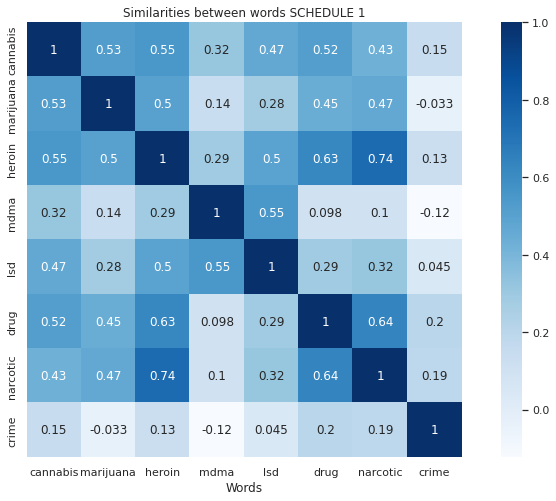

In [ ]:
f, ax=plt.subplots(1, 1, figsize=(14,8))
cmap = plt.cm.Blues
sns.heatmap(df, cmap=cmap, square=True,annot=True, ax=ax)
plt.xlabel('Words')
_=plt.title("Similarities between words SCHEDULE 1")

---

In [ ]:
## SCHEDULE 2
words = ["cocaine", "methamphetamine", "amphetamine",  "pseudoephedrine", "phencyclidine", "drug", "narcotic", "crime"]
similarities = np.zeros((len(words), len(words)), dtype=np.float_)
for idx1, word1 in enumerate(words):
    for idx2, word2 in enumerate(words):
        # note KeyError is possible if word doesn't exist
        sim = models_2['narco_2'].wv.similarity(word1, word2)
        similarities[idx1, idx2] = sim
        
df = pd.DataFrame.from_records(similarities, columns=words)
df.index = words

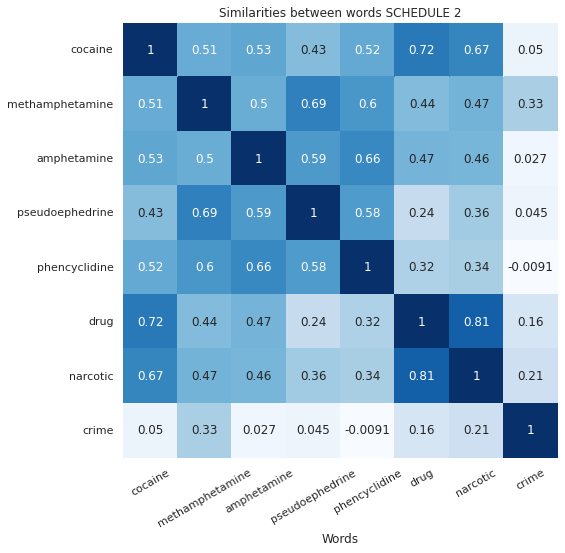

In [ ]:
f, ax=plt.subplots(1, 1, figsize=(14,8))
cmap = plt.cm.Blues
axr = sns.heatmap(df, cmap=cmap, square=True ,annot=True, ax=ax, cbar=False)
plt.xlabel('Words')
_=plt.xticks(rotation=30)
_=plt.title("Similarities between words SCHEDULE 2")